## To aufräum


Hier vllt Liste von Fragen, von denen ich erwarte, dass die Studenten sie beantworten können?

1. Beschreibe die Funktionalität des *Command Window*, *Editor* und *Workspace* in Matlab.
1. Was ist der Unterschied zwischen einer Funktion und einem Skript?
2. Was verbirgt sich hinter dem Wort *scope*?
3. Was ist ein *function handle*?
4. Aus welchem Grund sollte ich for-Schleifen vermeiden?

* Funktionen werden normalerweise in einem eigenen m-file gespeichert, siehe das Handout zur Matlab Einführung.

* Kurze Funktionen (Einzeiler) können in Variablen, so genannten 'function handles' abgespeichert werden.

In [25]:
% Die Unbekannten Größen einer function handle
% werden mit dem @-Symbol deklariert.
meineFunktion = @(x)  x.^2;

meineFunktion(2)
meineFunktion([2,3;4,5])

ans =  4
ans =

    4    9
   16   25



### Binominialkoeffizienten

siehe Handout

In [26]:
%% fac.m
% calculate the factorial of an integer n
function z = fac(n)
    if n==0
        z=1;
    else
        z=n*fac(n-1);
    end
end

In [27]:
n=5;
k=3;
fac(5)/(fac(k)*fac(n-k))

ans =  10


### Programmierübung 2: Rundungsfehler 

siehe Handout

In [28]:
max_iter=30;            % Anzahl der Iterationen
z = zeros(max_iter,1);  % Initialisiere Vektor für z aus Effizienzgründen
err = zeros(max_iter,1);% Initialisiere Vektor für err aus Effizienzgründen

z(1)=2*sqrt(2);         %Anfangswerte
err(1)=abs(pi-z(1))/pi;

for n=1:max_iter-1
    z(n+1)=2^(n+1.5)*sqrt(1-sqrt(1-4^(-n-1)*z(n)^2));
    err(n+1)=abs(pi-z(n+1))/pi;
end

Logarithmische Darstellung des Fehlers

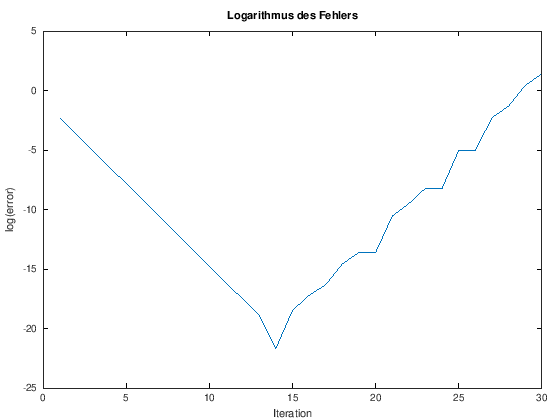

In [29]:
plot(log(err))
title('Logarithmus des Fehlers')
xlabel('Iteration')
ylabel('log(error)')